# Explore here

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

# Load dataset
# The dataset contains listings of NYC properties with various attributes.
nyc_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

### **Visualizing Dataset**

In [88]:
# Display first few rows to understand the structure of the dataset.
print(nyc_data.head())
print("Dataset Shape:", nyc_data.shape)
print(nyc_data.info())  # Check data types and missing values
print(nyc_data.describe())  # Summary statistics for numerical columns

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

# Problem Statement & Goal
### Determine the factors influencing and determining property price per night.

In [89]:
# HANDLE DUPLICATES
# Check for duplicate rows, excluding 'id' as it's unique.
duplicates = nyc_data.drop('id', axis=1).duplicated().sum()
print(f'The dataset contains {duplicates} duplicated values.')
if duplicates != 0:
    nyc_data.drop_duplicates(subset=nyc_data.columns.difference(['id']), inplace=True)

The dataset contains 0 duplicated values.


### **Duplicated Values**
#### The dataset contains 0 duplicated values.

In [90]:
# HANDLE NULL VALUES
# Identify missing values as a percentage of the total dataset.
nulls = nyc_data.isnull().sum() / len(nyc_data)
print("Percentage of Missing Values:")
print(nulls)

Percentage of Missing Values:
id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64


### **Null Values**
#### The dataset contained missing values in the 'last_review' and 'reviews_per_month' columns, indicating that not all listings received recent reviews.


In [91]:
# REMOVE IRRELEVANT DIMENSIONS
nyc_data.drop(['id', 'name', 'host_id', 'host_name'], axis=1, inplace=True)
print("Columns 'id', 'name', 'host_id', and 'host_name' are not relevant for analysis. Therefore, we remove them.")

Columns 'id', 'name', 'host_id', and 'host_name' are not relevant for analysis. Therefore, we remove them.


In [92]:

# REMOVE OUTLIERS
# Identifying and removing outliers using the Interquartile Range (IQR) method.
cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
for col in cols: 
    q1, q3 = nyc_data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    nyc_data = nyc_data[(nyc_data[col] >= (q1 - 1.5 * iqr)) & (nyc_data[col] <= (q3 + 1.5 * iqr))]

print("Data Info After Cleaning:")
print(nyc_data.info())

Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 23451 entries, 4 to 48852
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             23451 non-null  object 
 1   neighbourhood                   23451 non-null  object 
 2   latitude                        23451 non-null  float64
 3   longitude                       23451 non-null  float64
 4   room_type                       23451 non-null  object 
 5   price                           23451 non-null  int64  
 6   minimum_nights                  23451 non-null  int64  
 7   number_of_reviews               23451 non-null  int64  
 8   last_review                     23451 non-null  object 
 9   reviews_per_month               23451 non-null  float64
 10  calculated_host_listings_count  23451 non-null  int64  
 11  availability_365                23451 non-null  int64  
dtypes: float64(

### **Outliers**
#### Extreme values were observed in 'minimum_nights' and 'price', suggesting some listings have exceptionally high minimum night requirements or prices.

## Univariate Data Analysis

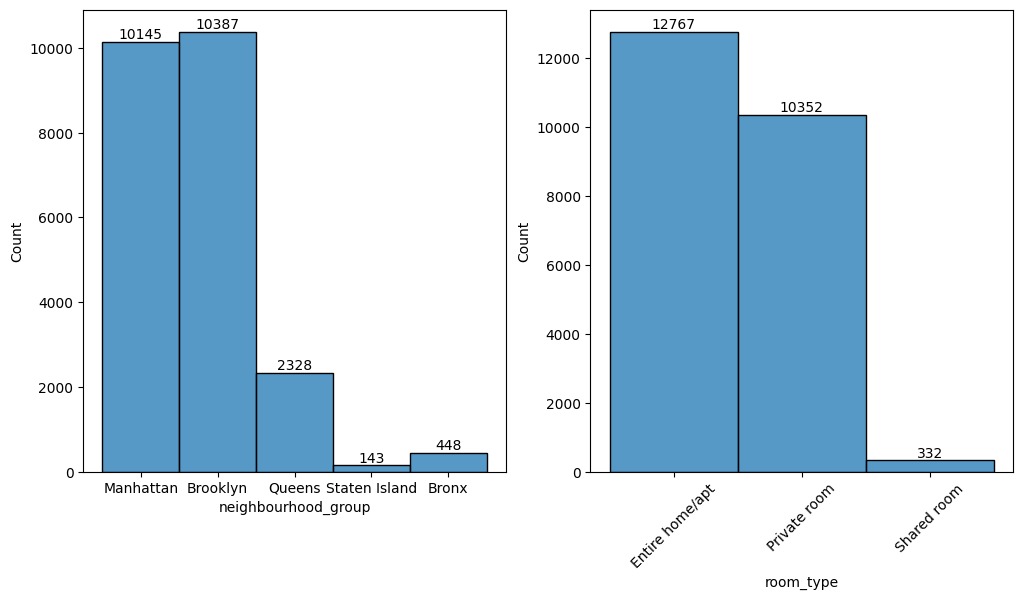

   neighbourhood_group  proportion
0                    1    0.442924
1                    0    0.432604
2                    2    0.099271
3                    4    0.019104
4                    3    0.006098
   room_type  proportion
0          0    0.544412
1          1    0.441431
2          2    0.014157


Text(0, 0.5, 'Frequency')

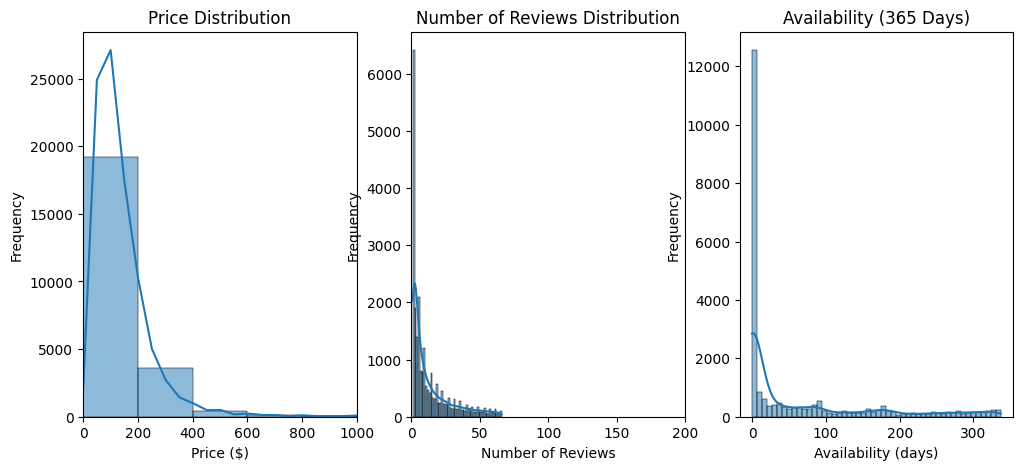

In [93]:
# Analyze categorical and numerical variables.
cat_dimensions = nyc_data[['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']]
num_dimensions = nyc_data[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

# Convert categorical variables into numerical representations using label encoding
for col in ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']:
    nyc_data[col] = pd.factorize(nyc_data[col])[0]

# Analyze distribution of categorical variables
fig, axis = plt.subplots(1,2, figsize=(12, 6))
sns.histplot(ax=axis[0], data=cat_dimensions, x='neighbourhood_group').bar_label(axis[0].containers[0])
sns.histplot(ax=axis[1], data=cat_dimensions, x='room_type').bar_label(axis[1].containers[0])
plt.xticks(rotation=45)
plt.show()

# Analyze the proportion of listings per neighborhood group and room type.
main_neighborhoods = nyc_data['neighbourhood_group'].value_counts(normalize=True).reset_index()
main_neighborhoods.columns = ['neighbourhood_group', 'proportion']
print(main_neighborhoods)

main_roomtypes = nyc_data['room_type'].value_counts(normalize=True).reset_index()
main_roomtypes.columns = ['room_type', 'proportion']
print(main_roomtypes)

plt.figure(figsize=(12, 5))

# Price Distribution
plt.subplot(1, 3, 1)
sns.histplot(nyc_data['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.xlim(0, 1000)  # Limiting x-axis to focus on majority of listings

# Number of Reviews Distribution
plt.subplot(1, 3, 2)
sns.histplot(nyc_data['number_of_reviews'], bins=50, kde=True)
plt.title("Number of Reviews Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.xlim(0, 200)  # Limiting x-axis for better visualization

# Availability 365 Days Distribution
plt.subplot(1, 3, 3)
sns.histplot(nyc_data['availability_365'], bins=50, kde=True)
plt.title("Availability (365 Days)")
plt.xlabel("Availability (days)")
plt.ylabel("Frequency")

# Insights from Univariate Data Analysis

## Neighborhood Distribution
- **Brooklyn (44.29%)** and **Manhattan (43.26%)** dominate the NYC market, accounting for nearly **87%** of all listings.
- Other boroughs have significantly fewer listings:
  - **Queens:** 9.93%
  - **Bronx:** 1.91%
  - **Staten Island:** 0.61%

## Room Type Distribution
- The majority of listings are for **Entire homes/apartments (54.44%)**, making them the **most preferred option** for guests.
- **Private rooms (44.14%)** also constitute a significant portion of the market.
- **Shared rooms (1.42%)** are the least common, indicating a lower demand for communal living spaces.

## Price Distribution
- The **price distribution is highly skewed**, with a **median price of ~$100**.
- While most listings fall within a **reasonable range**, some **luxury properties** are priced as high as **$1,000**.
- This suggests a mix of **budget-friendly options** and **premium, high-end rentals**.

## Reviews & Availability
- **Most listings have low review counts**, with a few highly-reviewed properties standing out as outliers.
- **Many listings have 0 availability days**, suggesting a large number of **inactive hosts or seasonal rentals**.
- Hosts with consistently available listings tend to receive **more reviews**, indicating higher guest engagement.


## Multivariate Data Analysis

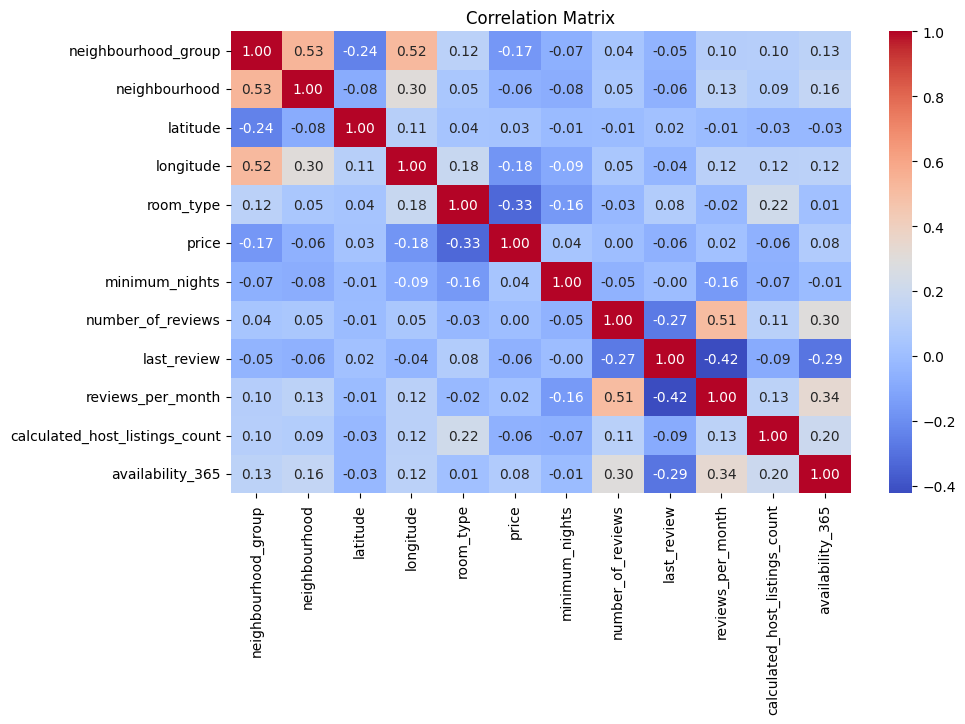

In [94]:
# Correlation matrix to understand relationships between variables.
correlation_matrix = nyc_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Insights from Multivariate Data Analysis

## Geospatial Correlation
- **Latitude** had a **weak correlation (0.03) with price**, indicating that **location within NYC does not significantly impact pricing**.
- **Longitude** showed a **stronger negative correlation (-0.18) with price**, suggesting that **moving eastward is associated with lower rental prices**.

## Availability Impact
- **Availability (365 days)** exhibited a **weak positive correlation (0.08) with price**, meaning **listings with more availability tend to have slightly higher prices**.


## Normalize Numerical Values

In [95]:
# Standardizing numerical variables to ensure uniformity.
X = nyc_data.drop('price', axis=1)[cols]
y = nyc_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

scaler = StandardScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=cols)

## Feature Selection

In [96]:
# FEATURE SELECTION
# Selecting the top 5 most relevant features using ANOVA F-test.
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(X_train_norm, y_train)
selected_features = X_train_norm.columns[selection_model.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


# Feature Selection Insights

## Key Predictors of Price
The most relevant features for predicting **price** were:

- **Minimum Nights** – Indicates the required stay duration, affecting pricing flexibility.
- **Number of Reviews** – Higher review counts often correlate with popular and competitively priced listings.
- **Reviews per Month** – Reflects guest engagement and demand over time.
- **Calculated Host Listings Count** – More listings per host may indicate professional rental management, which can impact pricing.
- **Availability 365** – The number of available days in a year, influencing pricing dynamics based on seasonality.

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data column

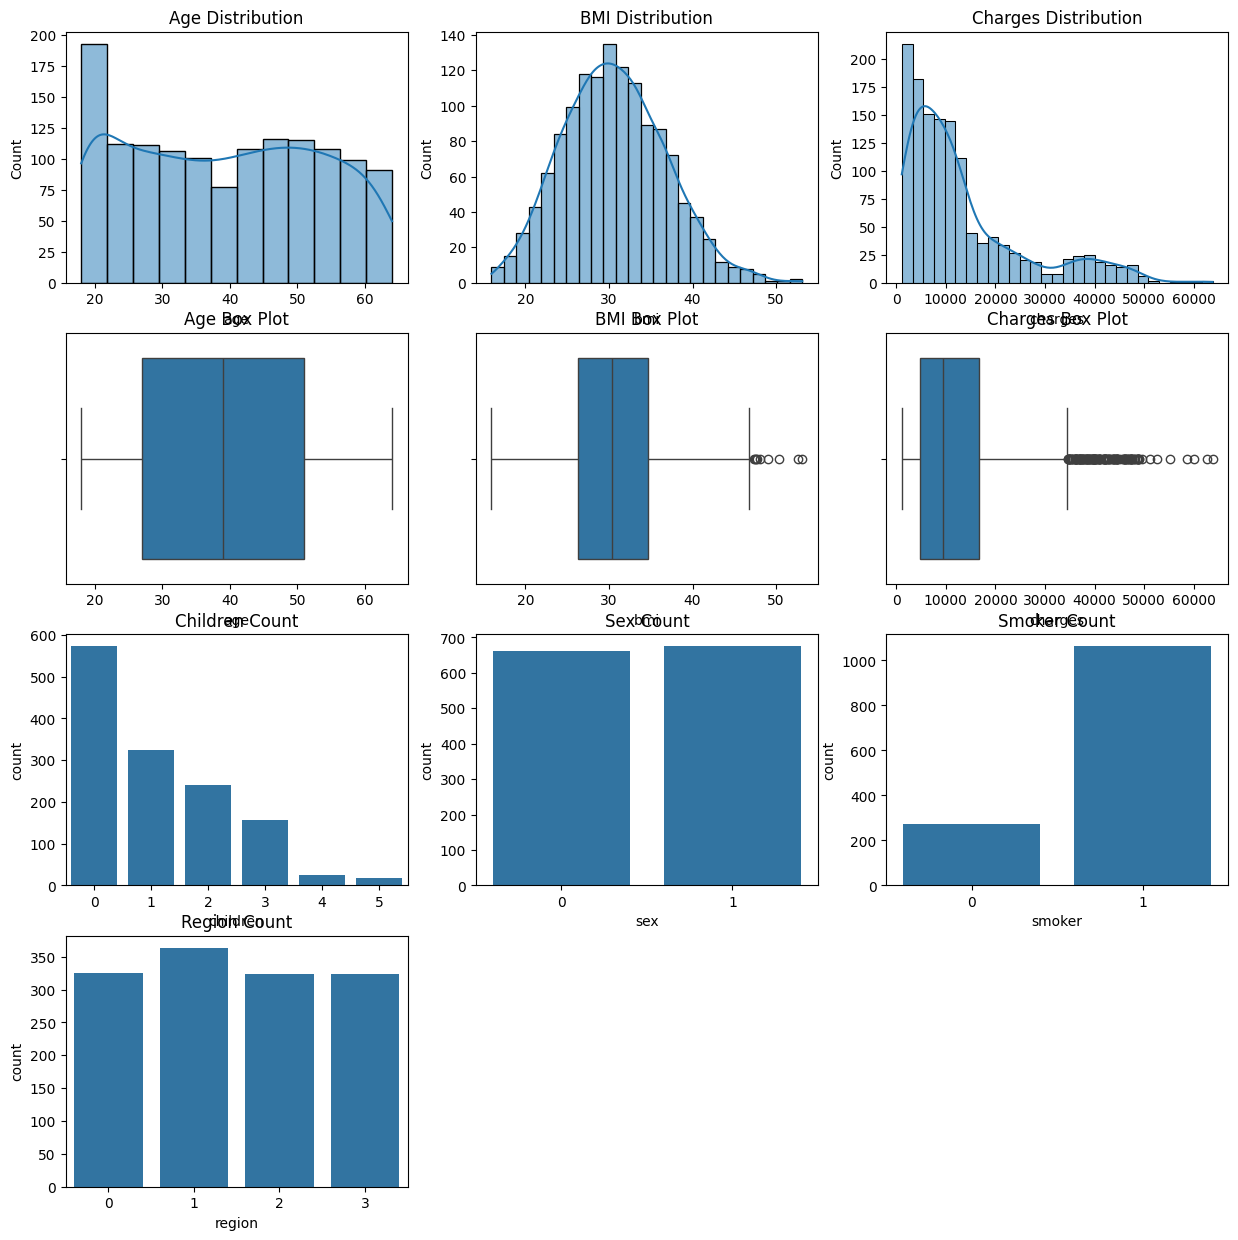

<Figure size 1500x1500 with 0 Axes>

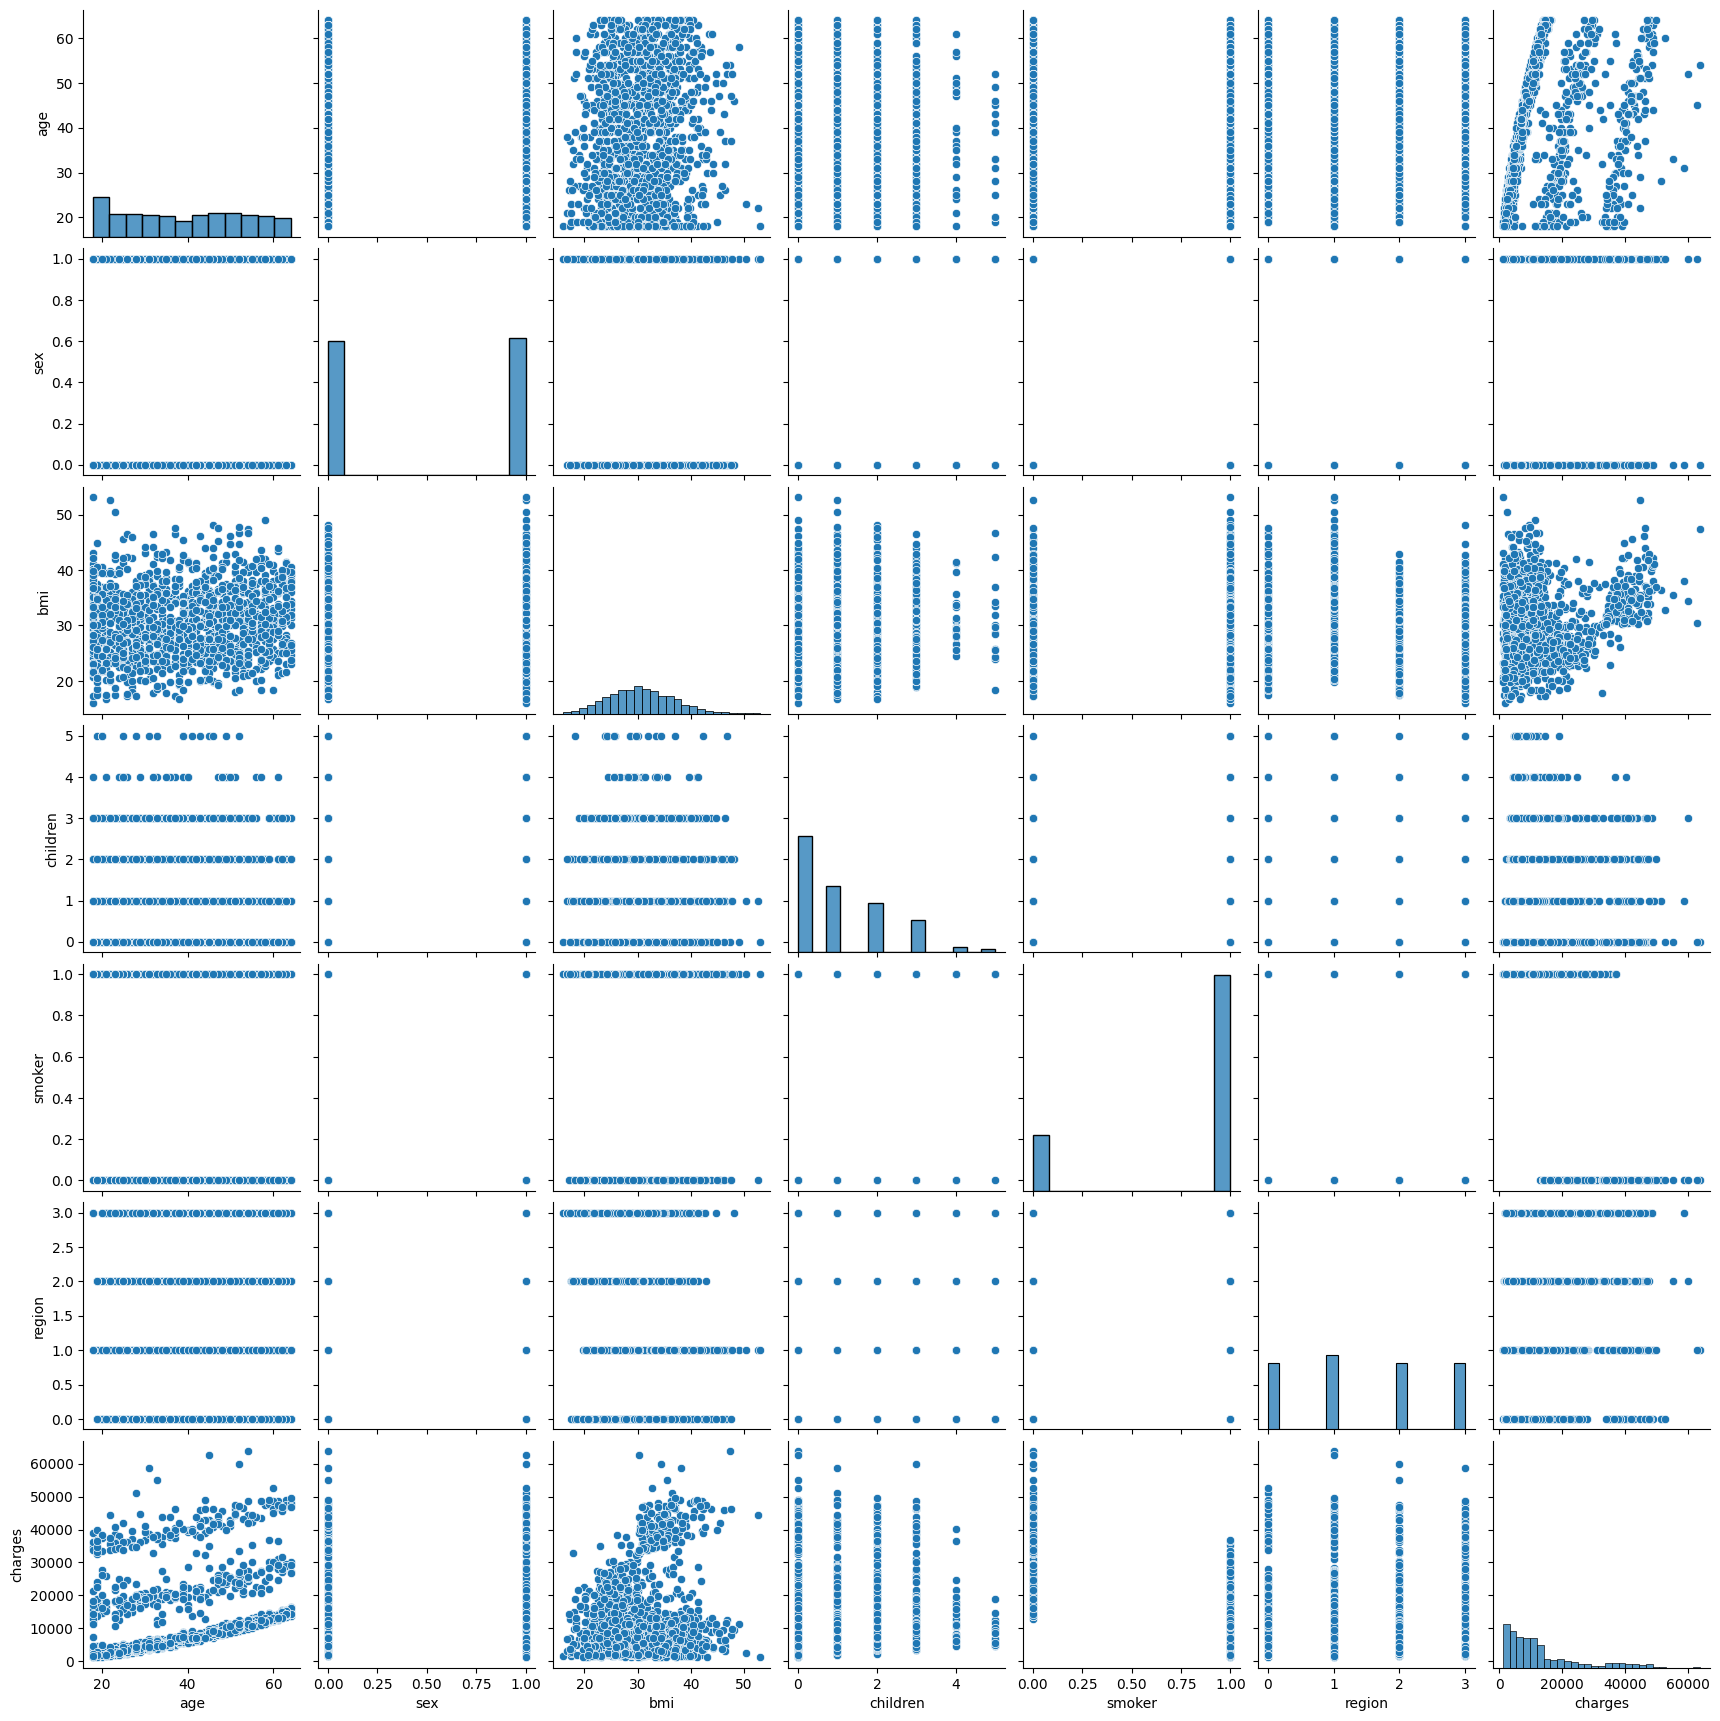

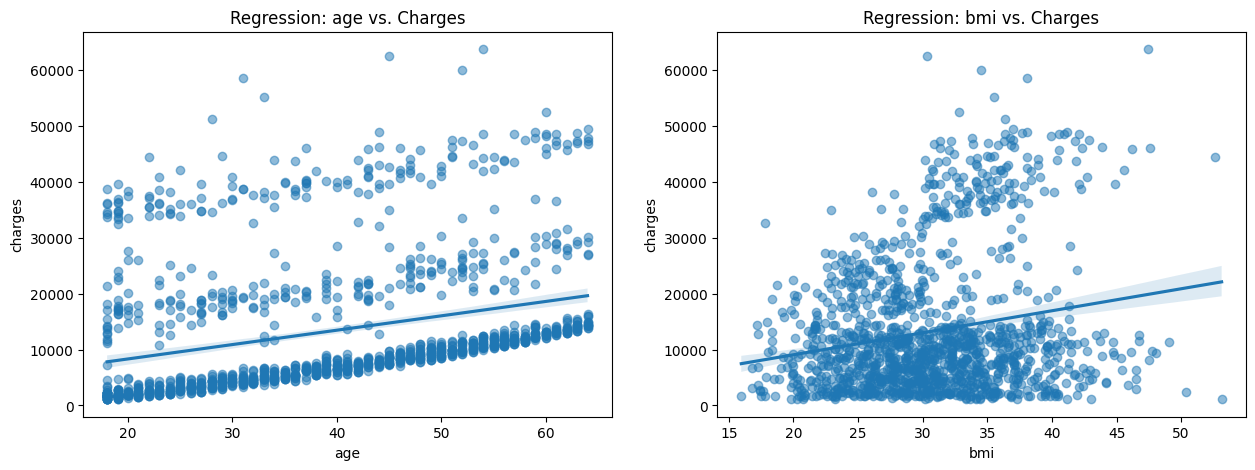

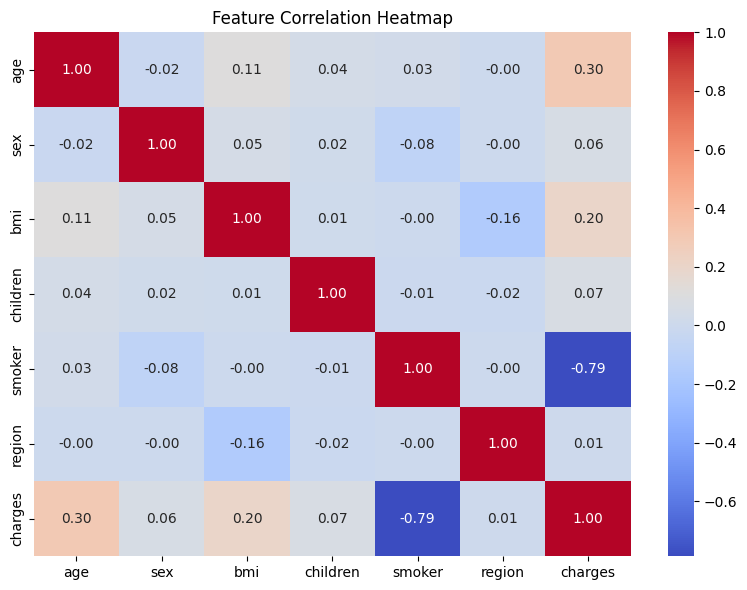

7
      age  sex     bmi  children  smoker  region      charges
34     28    1  36.400         1       0       0  51194.55914
543    54    0  47.410         0       0       1  63770.42801
577    31    0  38.095         1       0       3  58571.07448
819    33    0  35.530         0       0       2  55135.40209
1146   60    1  32.800         0       0       0  52590.82939
1230   52    1  34.485         3       0       2  60021.39897
1300   45    1  30.360         0       0       1  62592.87309
Overall correlation level: [[1.         0.19840083]
 [0.19840083 1.        ]]
High tail correlation level: [[1.         0.34568453]
 [0.34568453 1.        ]]
Model intercept: 13173.590095968195
Model coefficients: [ 3539.61364657  2128.93367675   666.25124671 -9496.92261006
  -121.32050454]
Model mean squared error: 39176750.1223677
Model r2 score: 0.7528015474254974


In [1]:
# Your code here
from utils import db_connect
engine = db_connect()

# your code here
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 #%%

insurance_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
print(insurance_data.head())
print(insurance_data.describe())
print(insurance_data.info())

# Drop duplicated values
print(f'Duplicate values: {insurance_data.duplicated().sum()}')
if insurance_data.duplicated().sum() != 0:
    insurance_data.drop_duplicates(inplace=True)

# Convert categorical values to numeric
cat_dimensions = ['sex', 'smoker', 'region']
# Dictionary to store mapping
factorize_mappings = {}

for col in cat_dimensions:
    encoded_value, categories = pd.factorize(insurance_data[col])
    factorize_mappings[col] = dict(enumerate(categories))
    insurance_data[col] = encoded_value
print(insurance_data.head())
print(insurance_data.info())
print(factorize_mappings)

# Univariate data analysis

fig, axes = plt.subplots(4,3, figsize=(15,15))

sns.histplot(data=insurance_data, x='age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
sns.histplot(data=insurance_data, x='bmi', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')
sns.histplot(data=insurance_data, x='charges', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Charges Distribution')
sns.boxplot(data=insurance_data, x='age', ax=axes[1, 0])
axes[1, 0].set_title('Age Box Plot')
sns.boxplot(data=insurance_data, x='bmi', ax=axes[1, 1])
axes[1, 1].set_title('BMI Box Plot')
sns.boxplot(data=insurance_data, x='charges', ax=axes[1, 2])
axes[1, 2].set_title('Charges Box Plot')
sns.countplot(data=insurance_data, x='children', ax=axes[2, 0])
axes[2, 0].set_title('Children Count')
sns.countplot(data=insurance_data, x='sex', ax=axes[2, 1])
axes[2, 1].set_title('Sex Count')
sns.countplot(data=insurance_data, x='smoker', ax=axes[2, 2])
axes[2, 2].set_title('Smoker Count')
sns.countplot(data=insurance_data, x='region', ax=axes[3, 0])
axes[3, 0].set_title('Region Count')
axes[3, 1].set_visible(False)
axes[3, 2].set_visible(False)

# Multivariate data analysis

plt.figure(figsize=(15,15))
sns.pairplot(insurance_data)

numeric_features = ['age', 'bmi']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(15, 5))
for i, feature in enumerate(numeric_features):
    sns.regplot(x=insurance_data[feature], y=insurance_data['charges'], ax=axes[i], scatter_kws={'alpha': 0.5})
    axes[i].set_title(f'Regression: {feature} vs. Charges')

plt.figure(figsize=(8, 6))
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

# Handle outliers
print(len(insurance_data[insurance_data['charges'] >= 50000]))
high_carges = insurance_data[insurance_data['charges'] >= 50000]
print(high_carges)
corr1_charges_bmi = np.corrcoef(insurance_data['charges'], insurance_data['bmi'])
print(f'Overall correlation level: {corr1_charges_bmi}')
corr2_charges_bmi = np.corrcoef(high_carges['charges'], high_carges['bmi'])
print(f'High tail correlation level: {corr2_charges_bmi}')
# It seems that there is a relationship between BMI and high charges, probably higher premiums due to high weight. Do not drop outliers.

# Split train and test data
from sklearn.model_selection import train_test_split

X = insurance_data[['age', 'bmi', 'children', 'smoker', 'sex']]
y = insurance_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

# Normalize dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

# Perform linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_norm, y_train)

a = print(f'Model intercept: {model.intercept_}')
coeffs = print(f'Model coefficients: {model.coef_}')

predictions = model.predict(X_test_norm)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Model mean squared error: {mse}')
print(f'Model r2 score: {r2}')